In [77]:
import matplotlib
from matplotlib import pyplot as plt
import igraph as ig
import numpy as np
import geopandas as gpd

In [76]:
g : ig.Graph = ig.read('/home/rico/Documents/thesis/experiments/ams_data/resulting_graph/Amsterdam_problem_graph_2022-06-15.gml')

In [82]:
print(f"{np.unique(g.vs.attributes())}")
print(f"{np.unique(g.vs['type'])}")
print(f"{len(g.vs.select(type_eq='res_node'))=}")
print(f"{len(g.vs.select(type_eq='pt_node'))=}")
print(f"{len(g.vs.select(type_eq='poi_node'))=}")
print(f"{np.unique(g.es.select(type_ne='walk')['type'])}")
print(f"{len(g.es.select(type_ne='walk'))=}")

['color' 'id' 'name' 'stopid' 'type' 'uniqueagencyid' 'x' 'y']
['poi_node' 'pt_node' 'res_node']
len(g.vs.select(type_eq='res_node'))=443
len(g.vs.select(type_eq='pt_node'))=561
len(g.vs.select(type_eq='poi_node'))=1193
['bus' 'ferry' 'metro' 'rail' 'tram']
len(g.es.select(type_ne='walk'))=1601


In [50]:
g_transit = g.subgraph_edges(g.es.select(type_ne='walk'), delete_vertices=False)
del g
kwb_21_ams_neighborhoods = gpd.read_parquet('/home/rico/Documents/thesis/experiments/ams_data/kwb_21_ams_neighborhoods.parquet')

<ipython-input-74-17403a9df674>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('./plots/amsterdam_network.svg', bbox='tight')


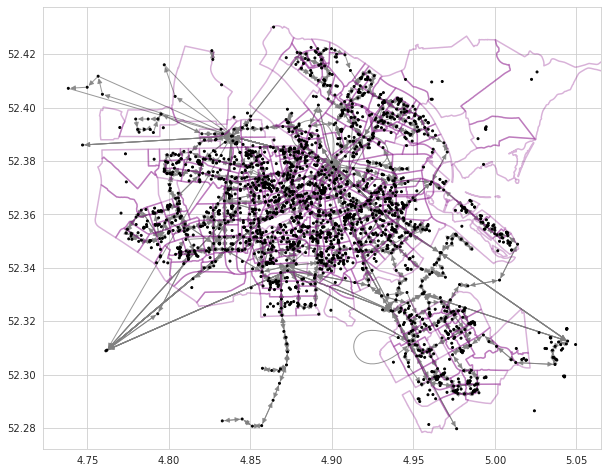

In [74]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

base = kwb_21_ams_neighborhoods.boundary.plot(figsize=(15, 15), edgecolor="purple", alpha=0.3, ax=ax)
_ = ig.plot(g_transit, target=base, edge_curved=[0]*len(g_transit.es), vertex_color=[(0,0,0,0.1)], vertex_size=2)

arrows = [e for e in base.get_children() if
          isinstance(e, matplotlib.patches.FancyArrowPatch)]  # This is a PathCollection

label_set = False
for j, (arrow, edge) in enumerate(zip(arrows, g_transit.es)):
    arrow.set_color('gray')
    arrow.set_alpha(0.8)

fig.savefig('./plots/amsterdam_network.svg')